
tdelay =

    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150
    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150
    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150
    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150
    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150
    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150
    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150
    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150
    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150
    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150    1.0150



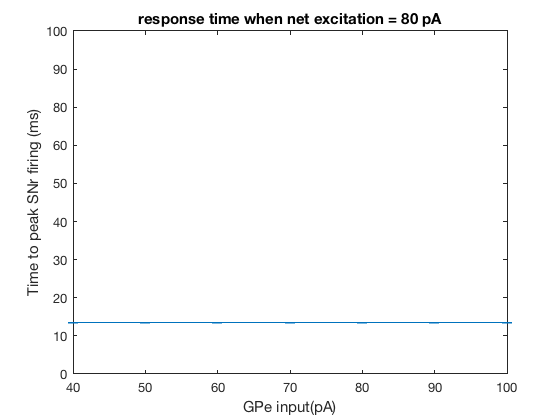

In [7]:
GPe_input = 40:10:100; % pA, inhibitory
tdelay = zeros(10,length(GPe_input));
for sim_i = 1:10
    for i = 1:length(GPe_input)
        %Runs 20s simulation without any stimulus to measure steady-state values. 
        [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

        clear spk_snr spk_gp
        dt=0.0001; % 0.1ms integration steps

        parfor l =1:100
            [Vm_gp, Vm_snr] = BGdelayline_excitation('I_exc_snr',80,'I_exc_gp',GPe_input(i),...
            'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','all'); % only SNr layer. 100 neurons
            spk_snr{l} = Vm_snr==15;
            spk_gp{l} = Vm_gp ==15;
        end
        spk_snr = transpose(double(reshape(cell2mat(spk_snr),[30002, 100])));


            binWidth = 100; % bin size, scale of 0.1ms

            t_bar = 1:binWidth:length(spk_snr);
            psth_snr = zeros(1,length(t_bar));
            psth_gp = zeros(1,length(t_bar));

            for psth_i = 1:length(t_bar)-1

                psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
                psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));

            end
            binloc = (binWidth/2+t_bar-1)*0.0001;

            [M,I]=max(psth_snr);

            if binloc(I)>1 & binloc(I)<1.2
                tdelay(sim_i,i) = binloc(I);
            else
                tdelay(sim_i,i) = NaN;
            end

        
    end
end
    
 tdelay
    figure
    errorbar(GPe_input,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('GPe input(pA)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([40 100])
    ylim([1 1.1])
    yticks(linspace(1,1.1,10))
    yticklabels({'0','10','20','30','40','50','60','80','90','100'})
    title(sprintf('response time when net excitation = %d pA',80))


In [6]:
A = cell2mat(spk_snr);

size(A)


ans =

           1      300020



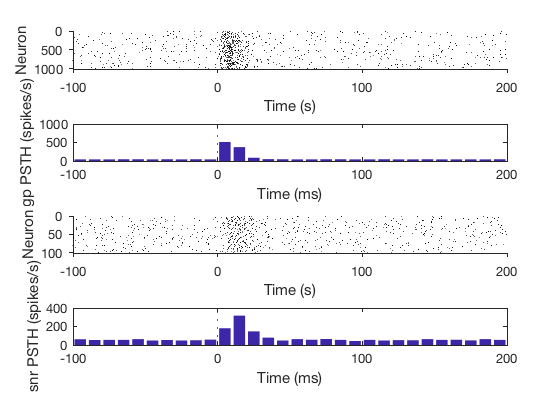

In [40]:
  %Runs 20s simulation without any stimulus to measure steady-state values. 
        [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

        clear spk_snr spk_gp
        dt=0.0001; % 0.1ms integration steps

        parfor l =1:100
            [Vm_gp, Vm_snr] = BGdelayline_excitation('stimCellsPer',10,'I_exc_snr',50,'I_exc_gp',60,...
            'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','all'); % only SNr layer. 100 neurons
            spk_snr{l,1} = Vm_snr==15;
            spk_gp{l,1} = Vm_gp ==15;
        end
        %spk_snr = double(reshape(cell2mat(spk_snr),[100, 30002]));
        spk_snr = double(cell2mat(spk_snr));
        spk_gp = double(reshape(cell2mat(spk_gp),[1000, 30002]));

            binWidth = 100; % bin size, scale of 0.1ms

            t_bar = 1:binWidth:length(spk_snr);
            psth_snr = zeros(1,length(t_bar));
            psth_gp = zeros(1,length(t_bar));

            for psth_i = 1:length(t_bar)-1

                psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
                psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));

            end
 
figure
subplot(4,1,1)
plotRaster(spk_gp)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

subplot(4,1,2) 
bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
%ylim([0 150])
vline(1)
ylabel('gp PSTH (spikes/s)')
xlabel('Time (ms)')

subplot(4,1,3)
plotRaster(spk_snr)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})


subplot(4,1,4) 
bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
%ylim([0 150])
vline(1)
ylabel('snr PSTH (spikes/s)')
xlabel('Time (ms)')







Here I vary the GPe excitatory input and measure time to peak of SNr activation

In [50]:

SNr_input = 50; 

for snr_i = 1:length(SNr_input)
    GPe_input = 10:10:100; % pA, inhibitory
    tdelay5 = zeros(10,length(GPe_input));
    tdelay10 = zeros(10,length(GPe_input));
    for sim_i = 1:10 % number of simulations
        for i = 1:length(GPe_input)
            %Runs 20s simulation without any stimulus to measure steady-state values. 
            [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

            clear spk_snr spk_gp
            dt=0.0001; % 0.1ms integration steps
            
            parfor l =1:100
            [Vm_gp, Vm_snr] = BGdelayline_excitation('stimCellsPer',50,'I_exc_snr',SNr_input(snr_i),'I_exc_gp',GPe_input(i),...
            'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','all'); % 
            spk_snr{l,1} = Vm_snr==15;
            %spk_gp{l} =  Vm_gp ==15;
            end
            
            spk_snr = double(cell2mat(spk_snr));
            
            binWidth5 = 50;
            binWidth10 = 100; % bin size, scale of 0.1ms
            t_bar5 = 1:binWidth5:length(spk_snr);
            t_bar10 = 1:binWidth10:length(spk_snr);
            psth_snr5 = zeros(1,length(t_bar5));
            psth_snr10 = zeros(1,length(t_bar10));
         %  psth_gp = zeros(1,length(t_bar));

            for psth_i = 1:length(t_bar5)-1
                psth_snr5(psth_i) = sum(sum(spk_snr(:,t_bar5(psth_i):(t_bar5(psth_i)+binWidth5-1))));
            %    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
            end
            for psth_i = 1:length(t_bar10)-1
                psth_snr10(psth_i) = sum(sum(spk_snr(:,t_bar10(psth_i):(t_bar10(psth_i)+binWidth10-1))));
            %    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
            end


            binloc5 = (binWidth5/2+t_bar5-1)*0.0001;
            binloc10 = (binWidth10/2+t_bar10-1)*0.0001;

            [M5,I5]=max(psth_snr5);
            [M10,I10]=max(psth_snr10);

            if binloc5(I5)>1 & binloc5(I5)<1.2
                    tdelay5(sim_i,i) = binloc5(I5);
            else
                    tdelay5(sim_i,i) = NaN;
            end

            if binloc10(I10)>1 & binloc10(I10)<1.2
                    tdelay10(sim_i,i) = binloc10(I10);
            else
                    tdelay10(sim_i,i) = NaN;
            end

        
        end
    end
    
    disp(SNr_input(snr_i))
    tdelay5
    figure(snr_i)
    subplot(2,1,1)
    e=errorbar(GPe_input,nanmean(tdelay5,1),nanstd(tdelay5,1)./sqrt(sum(~isnan(tdelay5),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('GPe input(pA)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([10 100])
    ylim([1 1.05])
    yticks(linspace(1,1.05,6))
    yticklabels({'0','10','20','30','40','50'})
    title(sprintf('response time when net excitation = %d pA %d ms bin',SNr_input(snr_i),5))
   
    tdelay10
    subplot(2,1,2)
    e=errorbar(GPe_input,nanmean(tdelay10,1),nanstd(tdelay10,1)./sqrt(sum(~isnan(tdelay10),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('GPe input(pA)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([10 100])
    ylim([1 1.05])
    yticks(linspace(1,1.05,6))
    yticklabels({'0','10','20','30','40','50'})
    title(sprintf('response time when net excitation = %d pA %d ms bin',SNr_input(snr_i),5))
   

end

Operation terminated by user during BGdelayline_excitation (line 147)


In parallel_function>make_general_channel/channel_general (line 914)
                    O = F(C{:});

In remoteParallelFunction (line 38)
        out = parallel.internal.pool.serialize(feval(channel, channelArgs{:}));

Operation terminated by user during BGdelayline_excitation (line 128)


In parallel_function>make_general_channel/channel_general (line 914)
                    O = F(C{:});

In remoteParallelFunction (line 38)
        out = parallel.internal.pool.serialize(feval(channel, channelArgs{:}));

Operation terminated by user during BGdelayline_excitation (line 114)


In parallel_function>make_general_channel/channel_general (line 914)
                    O = F(C{:});

In remoteParallelFunction (line 38)
        out = parallel.internal.pool.serialize(feval(channel, channelArgs{:}));

Operation terminated by user during BGdelayline_excitation (line 114)


In parallel_function>make_general_channel/channel_ge

Operation terminated by user during distcomp.remoteparfor/getCompleteIntervals (line 127)


In parallel_function>distributed_execution (line 820)
        [tags, out] = P.getCompleteIntervals(chunkSize);

In parallel_function (line 587)
        R = distributed_execution(...



the MATLAB function has been cancelled


I observed that GPe firing rate does not modulate time to peak of SNr activation, even with two different bin widths

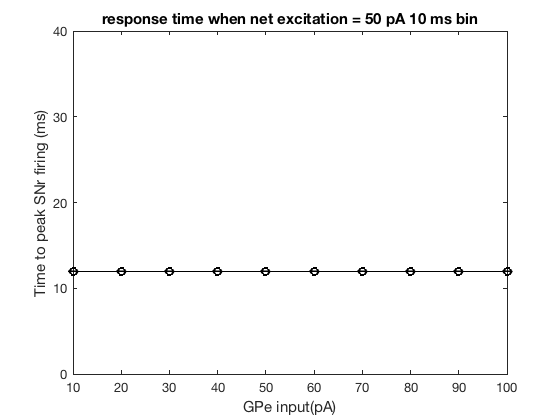

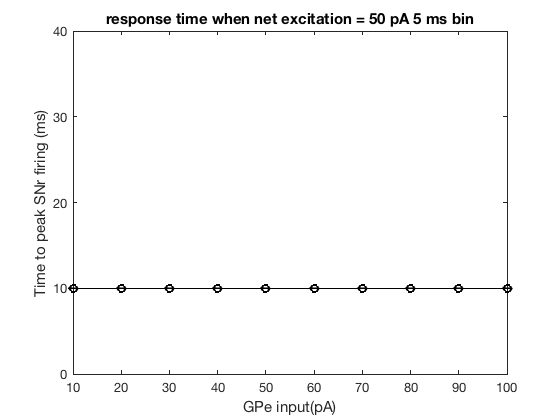

In [49]:
figure
    e=errorbar(GPe_input,nanmean(tdelay5,1),nanstd(tdelay5,1)./sqrt(sum(~isnan(tdelay5),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('GPe input(pA)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([10 100])
    ylim([1 1.05])
    yticks(linspace(1,1.05,6))
    yticklabels({'0','10','20','30','40','50'})
    title(sprintf('response time when net excitation = %d pA %d ms bin',SNr_input(snr_i),5))
  figure
    e=errorbar(GPe_input,nanmean(tdelay10,1),nanstd(tdelay10,1)./sqrt(sum(~isnan(tdelay10),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('GPe input(pA)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([10 100])
    ylim([1 1.05])
    yticks(linspace(1,1.05,6))
    yticklabels({'0','10','20','30','40','50'})
    title(sprintf('response time when net excitation = %d pA %d ms bin',SNr_input(snr_i),10))

Starting parallel pool (parpool) using the 'local' profile ...
connected to 4 workers.
    50


tdelay5 =

  Columns 1 through 7

       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
    1.0075    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125

  Columns 8 through 11

    1.0125    1.0125    1.0125    1.0125
    1.0125    1.0125    1.0125    1.0125
    1.0125    1.0125    1.0125    1.0125
    1.0125  

Error using errorbar>checkSingleInput (line 264)
XData must be the same size as YData.

Error in errorbar (line 94)
x = checkSingleInput(x, sz, 'XData');



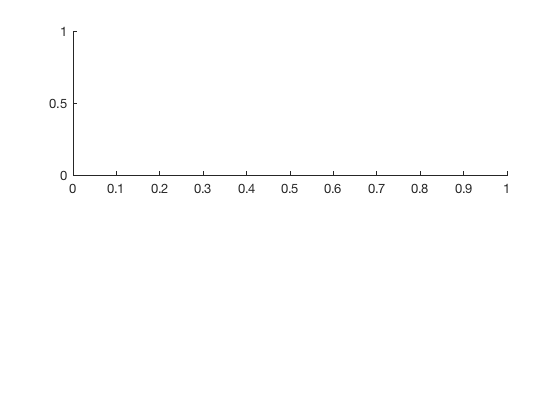

In [51]:
SNr_input = 50; 

for snr_i = 1:length(SNr_input)
    testRange = 0:10:100; % pA, inhibitory
    tdelay5 = zeros(10,length(testRange));
    tdelay10 = zeros(10,length(testRange));
    for sim_i = 1:10 % number of simulations
        for i = 1:length(testRange)
            %Runs 20s simulation without any stimulus to measure steady-state values. 
            [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

            clear spk_snr spk_gp
            dt=0.0001; % 0.1ms integration steps
            
            parfor l =1:100
            [Vm_gp, Vm_snr] = BGdelayline_excitation('stimCellsPer',testRange(i),'I_exc_snr',SNr_input(snr_i),'I_exc_gp',60,...
            'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','all'); % 
            spk_snr{l,1} = Vm_snr==15;
            %spk_gp{l} =  Vm_gp ==15;
            end
            
            spk_snr = double(cell2mat(spk_snr));
            
            binWidth5 = 50;
            binWidth10 = 100; % bin size, scale of 0.1ms
            t_bar5 = 1:binWidth5:length(spk_snr);
            t_bar10 = 1:binWidth10:length(spk_snr);
            psth_snr5 = zeros(1,length(t_bar5));
            psth_snr10 = zeros(1,length(t_bar10));
         %  psth_gp = zeros(1,length(t_bar));

            for psth_i = 1:length(t_bar5)-1
                psth_snr5(psth_i) = sum(sum(spk_snr(:,t_bar5(psth_i):(t_bar5(psth_i)+binWidth5-1))));
            %    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
            end
            for psth_i = 1:length(t_bar10)-1
                psth_snr10(psth_i) = sum(sum(spk_snr(:,t_bar10(psth_i):(t_bar10(psth_i)+binWidth10-1))));
            %    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
            end


            binloc5 = (binWidth5/2+t_bar5-1)*0.0001;
            binloc10 = (binWidth10/2+t_bar10-1)*0.0001;

            [M5,I5]=max(psth_snr5);
            [M10,I10]=max(psth_snr10);

            if binloc5(I5)>1 & binloc5(I5)<1.2
                    tdelay5(sim_i,i) = binloc5(I5);
            else
                    tdelay5(sim_i,i) = NaN;
            end

            if binloc10(I10)>1 & binloc10(I10)<1.2
                    tdelay10(sim_i,i) = binloc10(I10);
            else
                    tdelay10(sim_i,i) = NaN;
            end

        
        end
    end
    
    disp(SNr_input(snr_i))
    tdelay5
    figure(snr_i)
    subplot(2,1,1)
    e=errorbar(GPe_input,nanmean(tdelay5,1),nanstd(tdelay5,1)./sqrt(sum(~isnan(tdelay5),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('Striatum activation (%)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([0 100])
    ylim([1 1.05])
    yticks(linspace(1,1.05,6))
    yticklabels({'0','10','20','30','40','50'})
    title(sprintf('response time when net excitation = %d pA %d ms bin',SNr_input(snr_i),5))
   
    tdelay10
    subplot(2,1,2)
    e=errorbar(GPe_input,nanmean(tdelay10,1),nanstd(tdelay10,1)./sqrt(sum(~isnan(tdelay10),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('Striatum activation (%)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([0 100])
    ylim([1 1.05])
    yticks(linspace(1,1.05,6))
    yticklabels({'0','10','20','30','40','50'})
    title(sprintf('response time when net excitation = %d pA %d ms bin',SNr_input(snr_i),5))
   

end


tdelay5 =

  Columns 1 through 7

       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
       NaN    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125
    1.0075    1.0125    1.0125    1.0125    1.0125    1.0125    1.0125

  Columns 8 through 11

    1.0125    1.0125    1.0125    1.0125
    1.0125    1.0125    1.0125    1.0125
    1.0125    1.0125    1.0125    1.0125
    1.0125    1.0125    1.0125    1.0125
    1.0125    1.0125    1.0125    1.0125
    1.0125    1.0125    1

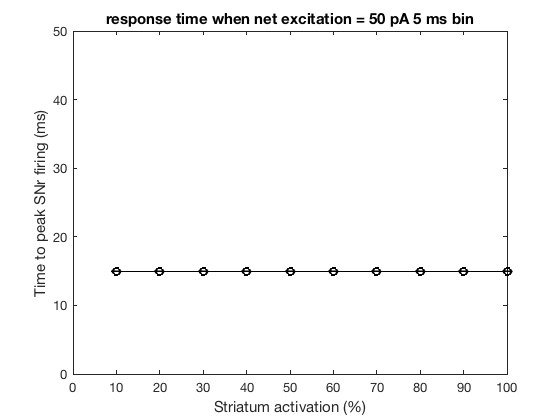

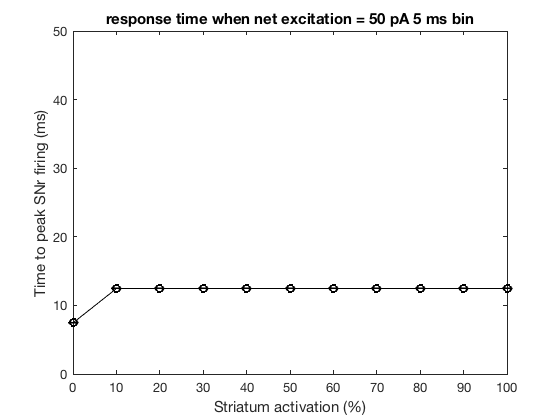

In [53]:
tdelay5
     figure
    e=errorbar(testRange,nanmean(tdelay5,1),nanstd(tdelay5,1)./sqrt(sum(~isnan(tdelay5),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('Striatum activation (%)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([0 100])
    ylim([1 1.05])
    yticks(linspace(1,1.05,6))
    yticklabels({'0','10','20','30','40','50'})
    title(sprintf('response time when net excitation = %d pA %d ms bin',SNr_input(snr_i),5))
   
    tdelay10
    figure
    e=errorbar(testRange,nanmean(tdelay10,1),nanstd(tdelay10,1)./sqrt(sum(~isnan(tdelay10),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('Striatum activation (%)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([0 100])
    ylim([1 1.05])
    yticks(linspace(1,1.05,6))
    yticklabels({'0','10','20','30','40','50'})
    title(sprintf('response time when net excitation = %d pA %d ms bin',SNr_input(snr_i),5))
   